In [1]:
# install packages
!pip install nltk 
!pip install owlready2 
!pip install pronto 
!pip install ipynb-py-convert 
!pip install langdetect 
!pip install contractions 
!pip install inflect 
!pip install num2words 
!pip install tables 
!pip install h5py 
!pip install sentence-transformers
!pip install pandas 
!pip install tqdm 
!pip install seaborn
!pip install numpy 
!pip install scipy 
!pip install matplotlib
!pip install numpy
!pip install bottleneck 
!pip install pandarallel 
!pip install wordcloud
!pip install  --user spacy
!pip install --user https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

     |████████████████████████████████| 20.9MB 1.3MB/s 
  Created wheel for owlready2: filename=Owlready2-0.25-cp36-cp36m-linux_x86_64.whl size=20269689 sha256=d4737d7529b6a4e4040c1db11e22aa4ace976d834a5e64e43be181f03d92dfc0
  Stored in directory: /root/.cache/pip/wheels/62/74/7f/ab814059f816d87b26a1e1ec242c40d443cd2e22b0868a2a94
Successfully built owlready2
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 1.8MB 23.9MB/s 
  Created wheel for ipynb-py-convert: filename=ipynb_py_convert-0.4.6-cp36-none-any.whl size=4625 sha256=31e4a8e49870716668e4f8370754b2cd76469d8cc5bd749945bcab66f3493d9f
  Stored in directory: /root/.cache/pip/wheels/80/dc/7c/a7279f7726d66951fe48d5afd45247bcf5bf92c98282e4e78e
Successfully built ipynb-py-convert
     |████████████████████████████████| 983kB 20.9MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993195 sha256=42945defb2fb9dabdaccc1ffddef8d595361e3b4ff8a12cc8962080dea141016


In [2]:
!pip install semantic_text_similarity

     |████████████████████████████████| 419kB 11.8MB/s 
     |████████████████████████████████| 163kB 42.2MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 51kB 9.2MB/s 
     |████████████████████████████████| 133kB 48.3MB/s 
     |████████████████████████████████| 6.8MB 38.8MB/s 
     |████████████████████████████████| 71kB 11.0MB/s 
  Created wheel for python-levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144792 sha256=87e187a26905f055c9fed2cd834e4eb3e99450bda4c51553ab7a698d60dce453
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-levenshtein
ERROR: botocore 1.19.20 has requirement urllib3<1.27,>=1.25.4; python_version != "3.4", but you'll have urllib3 1.24.3 which is incompatible.


In [3]:
from semantic_text_similarity.models import ClinicalBertSimilarity


In [4]:
!pip install ahocorasick

ERROR: Could not find a version that satisfies the requirement ahocorasick (from versions: none)
ERROR: No matching distribution found for ahocorasick


In [5]:

from collections import defaultdict
import glob
import itertools
import json
import pickle
import os
import re

import bs4
import inflect
from langdetect import *
import matplotlib.pyplot as plt
import networkx as nx
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import tokenize
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import numpy as np
import pandas as pd
from pandarallel import pandarallel
from PIL import Image
import requests
import seaborn as sns
from sentence_transformers import *
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher
from spacy.tokens import Span
from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Initialize pandarallel
pandarallel.initialize(use_memory_fs=False,nb_workers=2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [7]:
# data.frame for meta data
import pandas as pd
meta_df = pd.read_csv('all_sources_metadata_2020-03-13.csv',
                      dtype={'pubmed_id': str,
                             'Microsoft Academic Paper ID': str,
                             'doi': str,
                             'journal':str
                             },
                     low_memory=False)
print(len(meta_df)) # number of lines in meta_df_all
df_covid =meta_df[['sha', 'abstract', 'authors', 'title',  'journal', 'publish_time']]
df_covid=df_covid.dropna( subset=['abstract'])
df_covid=df_covid.rename(columns={"sha": "paper_id"})
df_covid.head()

29500


,paper_id,abstract,authors,title,journal,publish_time
2,210a892deb1c61577f6fba58505fd65356ce6636,The geographic spread of 2019 novel coronaviru...,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Incubation Period and Other Epidemiological Ch...,Journal of Clinical Medicine,2020
3,e3b40cc8e0e137c416b4a2273a4dca94ae8178cc,"In December 2019, cases of unidentified pneumo...","Deng, Sheng-Qun; Peng, Hong-Juan",Characteristics of and Public Health Responses...,J Clin Med,2020
5,0df0d5270a9399cf4e23c0cdd877a80616a9725e,The basic reproduction number of an infectious...,"Tang, Biao; Bragazzi, Nicola Luigi; Li, Qian; ...",An updated estimation of the risk of transmiss...,Infectious Disease Modelling,2020
6,f24242580be243d5fc3f432915d86af6854bb8b7,The initial cluster of severe pneumonia cases ...,"Roosa, K.; Lee, Y.; Luo, R.; Kirpich, A.; Roth...",Real-time forecasts of the 2019-nCoV epidemic ...,Infectious Disease Modelling,2020
8,e1b336d8be1a4c0ccc5a1bf41e48b3b004d3ece1,Cruise ships carry a large number of people in...,"Rocklöv, J.; Sjödin, H.; Wilder-Smith, A.",COVID-19 outbreak on the Diamond Princess crui...,Journal of Travel Medicine,2020


In [ ]:
df.shape

In [9]:
# function to check if text of certain column in dataframe is written in certain language 
def is_lang(row, item, lang, dropNA=True):
    if (row[item] != None and row[item] != '' and row[item] != 'None' and isinstance(row[item], str)):
        try:
            return detect(row[item]) == lang
        except Exception as e:
            #print("Non-readable entity will be droped from data.frame")
            return False
    else:
        return not dropNA

# select article written in certain language 
def select_article_lang_multi(df, basedon='abstract', lang='en'):
    return df[df.parallel_apply(lambda text: is_lang(text, basedon, lang), axis=1)]

df_covid_eng = select_article_lang_multi(df_covid)
print('Number of English Articles: {}/{}'.format(len(df_covid_eng), len(df_covid)))
df_covid_eng.head(n=2)

Number of English Articles: 26879/26909


,paper_id,abstract,authors,title,journal,publish_time
2,210a892deb1c61577f6fba58505fd65356ce6636,The geographic spread of 2019 novel coronaviru...,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Incubation Period and Other Epidemiological Ch...,Journal of Clinical Medicine,2020
3,e3b40cc8e0e137c416b4a2273a4dca94ae8178cc,"In December 2019, cases of unidentified pneumo...","Deng, Sheng-Qun; Peng, Hong-Juan",Characteristics of and Public Health Responses...,J Clin Med,2020


In [10]:
## text level processors
def replace_brackets_with_whitespace(text):
    text = text.replace('(', '')
    text = text.replace(')', '')
    text = text.replace('[', '')
    text = text.replace(']', '')
    return text


# remove special characters
def strip_characters(text):
    t = re.sub('\(|\)|:|,|;|\.|’||“|\?|%|>|<', '', text)
    t = re.sub('/', ' ', t)
    t = t.replace("'",'')
    return t

## word level processors:
def to_lowercase(word):
    return word.lower()

def do_stemming(stemmer):
    return lambda word: stemmer.stem(word)

def do_lemmatizing(lemmatizer):
    return lambda word: lemmatizer.lemmatize(word, pos='v') 

# help function to test if word is stopword
def is_stopword(word):
    return word in stopwords.words('english')

# function to process word
def process_word_by(word_cleanner, uniqueYN):
    def cond(word):
        return (len(word) > 1 and
                not is_stopword(word) and
                not word.isnumeric() and
                word.isalnum() and
                word != len(word) * word[0])

    def clean_byword(text):
        return list(take_unique(uniqueYN)((word_cleanner(word) for word in text if cond(word))))

    return clean_byword

# function to decide making a set (unique words) from text or not
def take_unique(YN):
    return set if YN else lambda x:x
def compose(*funcs):
    *funcs, penultimate, last = funcs
    if funcs:
        penultimate = compose(*funcs, penultimate)
    return lambda *args: penultimate(last(*args))
# function to pre_processing the text
## compose text and word processors by combine every individual processor together 
text_processor = compose(replace_brackets_with_whitespace, strip_characters)
word_processor = compose(to_lowercase, do_lemmatizing(WordNetLemmatizer()), do_stemming(PorterStemmer())) # it is crucial to do stemming after lemmatization

## pre_processing function taking a dataframe and text and word processor functions as input and clean the text and tokenize the specified column
def pre_processing(df, text_tools, word_tools):
    def inner(col, uniqueYN=False):
        return df[col].parallel_apply(text_tools).parallel_apply(nltk.word_tokenize).parallel_apply(process_word_by(word_tools,uniqueYN=uniqueYN))
    return inner

In [11]:
tokenized_df = df_covid_eng.sort_values(by='publish_time', ascending=False)
tokenized_df=tokenized_df[0:1000]

In [12]:
# created processor function with chosen text and work processors and apply it to all articles to clean and tokenize all abstracts
processor = pre_processing(tokenized_df, text_processor, word_processor)
tokenized_df['abstract_token'] = processor('abstract')
# reset index (this is necessary for cosine similarity search)
tokenized_df = tokenized_df.reset_index(drop=True)
# Our processor function is a generic procedure to clean and tokenize any column with user specified column name, such as 'abstract' or 'body_text'
# Because processing body_text takes too long, we only process abstract
# tokenized_df['body_text_token'] = processor('body_text')

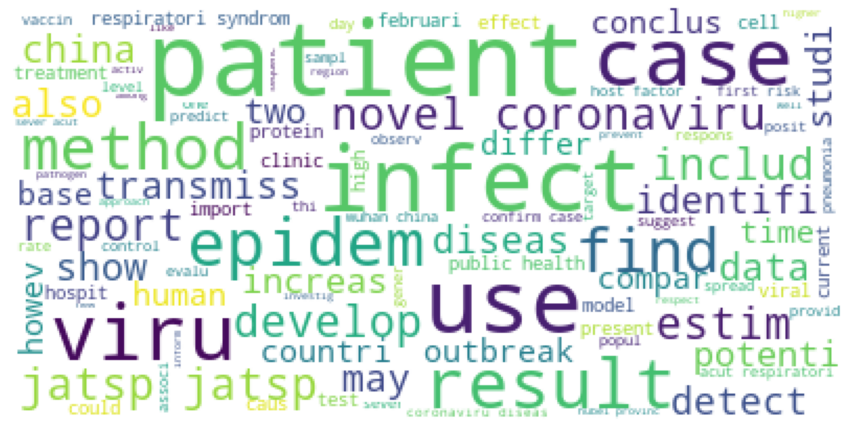

In [13]:
tokenized_df['abstract_corpus'] = tokenized_df['abstract_token'].apply(lambda tokens: ' '.join(tokens))
corpus = tokenized_df['abstract_corpus'].tolist()
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords.words('english'),
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(' '.join(corpus))
fig = plt.figure(1)
fig.set_size_inches(15,12)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [14]:
# Function to get top n-grams
def get_top_nK_words(corpus, K=1, n=None):
    vec1 = CountVectorizer(max_df=0.7,stop_words=stopwords.words('english'), ngram_range=(K,K),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

[Text(0, 0, 'patient'),
 Text(0, 0, 'case'),
 Text(0, 0, 'infect'),
 Text(0, 0, 'use'),
 Text(0, 0, 'coronaviru'),
 Text(0, 0, 'diseas'),
 Text(0, 0, 'china'),
 Text(0, 0, 'jatsp'),
 Text(0, 0, 'viru'),
 Text(0, 0, 'outbreak'),
 Text(0, 0, 'studi'),
 Text(0, 0, 'result'),
 Text(0, 0, 'sever'),
 Text(0, 0, 'wuhan'),
 Text(0, 0, 'cell'),
 Text(0, 0, 'model'),
 Text(0, 0, 'respiratori'),
 Text(0, 0, 'clinic'),
 Text(0, 0, 'data'),
 Text(0, 0, 'number')]

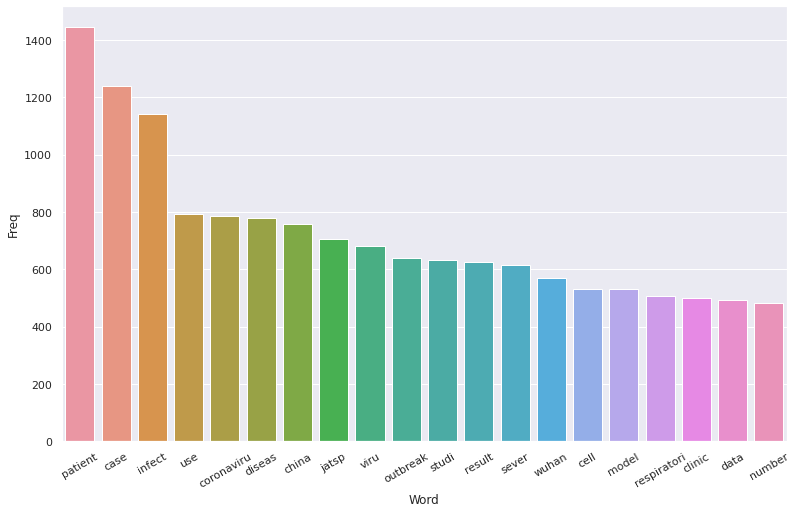

In [15]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_nK_words(corpus, K=1, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                Bi-gram  Freq
0      novel coronaviru   307
1         public health   189
2   respiratori syndrom   176
3      acut respiratori   162
4          confirm case   148
5           host factor   134
6           wuhan china   132
7     coronaviru diseas   127
8         hubei provinc   127
9            sever acut   122
10     jatsp background   109
11       infecti diseas   105
12     reproduct number   103
13   syndrom coronaviru    88
14         incub period    79
15           wuhan citi    71
16            thi studi    71
17         nucleic acid    70
18    coronaviru infect    68
19        immun respons    66


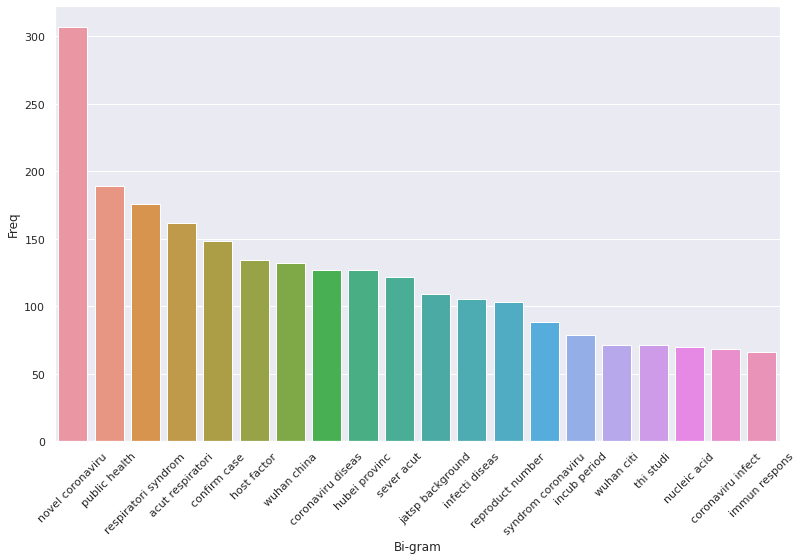

In [16]:
# Top bi-grams
top2_words = get_top_nK_words(corpus, K=2, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)
fig = h.get_figure()

                          Tri-gram  Freq
0           sever acut respiratori   119
1         acut respiratori syndrom   112
2   respiratori syndrom coronaviru    87
3           middl east respiratori    57
4         east respiratori syndrom    55
5           basic reproduct number    50
6       novel coronaviru pneumonia    46
7               world health organ    44
8              wuhan hubei provinc    39
9        outbreak novel coronaviru    34
10             public health emerg    32
11         novel coronaviru infect    32
12             hubei provinc china    32
13             number confirm case    30
14        among midwestern poultri    30
15            identifi host factor    28
16             identif host factor    28
17         novel coronaviru diseas    27
18           caus novel coronaviru    25
19        polymeras chain reaction    25


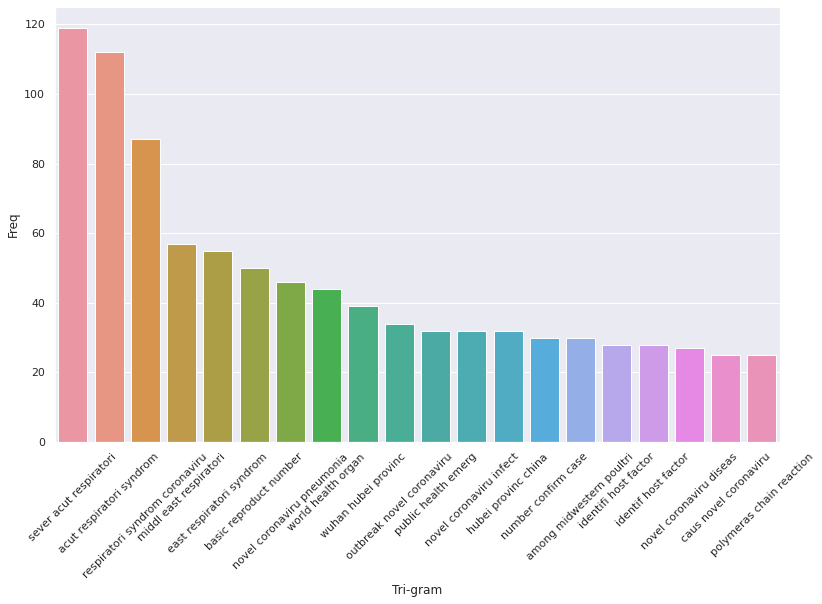

In [17]:
top3_words = get_top_nK_words(corpus, K=3, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)
fig = j.get_figure()

In [18]:
# compute TF-IDF scores for word vectors
def tfidf_(df):
    myvectorizer = TfidfVectorizer()
    vectors = myvectorizer.fit_transform(df['abstract_token'].parallel_apply(lambda x:' '.join(x))).toarray()
    feature_names = myvectorizer.get_feature_names()
    veclist = vectors.tolist()
    out_tfidf = pd.DataFrame(veclist, columns=feature_names)
    return out_tfidf

tfidf_(tokenized_df[:20]).head()

,1ab,50,90th,99th,abil,abl,abund,account,accumul,accur,accuraci,ace2,acid,across,activ,acut,adapt,addit,adequ,adjust,adjuv,administr,adopt,aerosol,after,age,agent,agil,aim,air,airborn,align,aliphat,all,alongsid,alreadi,also,although,amino,among,...,use,util,vaccin,valid,valu,variat,vendor,ventil,via,viral,virtual,viru,virus,vitro,vivo,warrant,water,we,week,well,whether,while,whilst,whole,widespread,wildlif,window,wish,withdraw,within,women,work,worldwid,would,wuchang,wuhan,year,yearsiqr,yet,yunnan
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.259563,0.000000,0.000000,0.0,0.000000,0.000000,0.107277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.147644,0.0,0.000000,0.00000,0.000000,0.147644,0.147644,0.000000,0.0,0.295289,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.066609,0.0,0.0,0.055059,0.0,0.000000,0.000000,0.066609,0.0,0.000000,0.066609,0.055059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.037231,0.0,0.000000,0.0,0.0,0.133218,0.0,0.0,0.0,0.000000,0.0,0.037231,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.066609,0.0,0.000000,0.0,0.075777,0.00000,0.075777,0.000000,0.000000,0.066609,0.0,0.000000,0.000000,0.055059,0.0,0.078773,0.0,0.0,0.000000,0.00000
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.077283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08792,0.0,0.000000,0.077283,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.165166,0.0,0.086396,0.000000,0.077283,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.077283,0.000000,0.0,0.000000,0.0,0.0,0.175841,0.00000
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.063394,0.000000,0.068525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.074804,0.000000,0.000000,0.000000,...,0.000000,0.0,0.074804,0.0,0.0,0.000000,0.0,0.0,0.0,0.118112,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.068525,0.0,0.000000,0.0,0.0,0.000000,0.00000
4,0.09027,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.079349,0.079349,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.079349,0.079349,0.079349,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.088705,0.079349,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.09027,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.09027


In [34]:
# using sklearn is 10 times faster than self-written script
# extract key-words with tfidf score
tfidf_scores_df = tfidf_(tokenized_df[:20])
N = 15 # Number of min/max values 
u = np.argpartition(tfidf_scores_df, axis=1, kth=N).values
v = tfidf_scores_df.columns.values[u].reshape(u.shape)
maxdf = pd.DataFrame(v[:,-N:]).rename(columns=lambda x: f'Max{x+1}')
maxdf.head()

,Max1,Max2,Max3,Max4,Max5,Max6,Max7,Max8,Max9,Max10,Max11,Max12,Max13,Max14,Max15
0,acid,ace2,wish,withdraw,accuraci,accur,work,accumul,account,abund,abl,abil,99th,90th,yunnan
1,ace2,window,accuraci,accur,within,accumul,account,abund,would,abl,wuhan,abil,99th,90th,yunnan
2,across,acid,ace2,accuraci,accur,accumul,account,worldwid,abund,abl,abil,99th,90th,yet,yunnan
3,activ,across,acid,ace2,accuraci,accur,accumul,account,would,abund,abl,abil,99th,90th,yunnan
4,junction,insert,ident,evid,event,denot,contrast,complet,closest,character,caus,bind,beyond,bat,yunnan


In [35]:
def gen_vector_T(tokens):
    Q = np.zeros((len(vocabulary)))    
    x= tfidf.transform(tokens)
    #print(tokens[0].split(','))
    for token in tokens[0].split(','):
        #print(token)
        try:
            ind = vocabulary.index(token)
            Q[ind]  = x[0, tfidf.vocabulary_[token]]
        except:
            pass
    return Q

# calculate cosine similarity
def cosine_sim(a, b):
    cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return cos_sim

# Function to get transformed tfidf model
def tfidf_tran(mydf):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(mydf['abstract_token'].parallel_apply(lambda x:' '.join(x)))
    return vectors

# Define wordLemmatizer
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
def wordLemmatizer(data):
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    file_clean_k =pd.DataFrame()
    for index,entry in enumerate(data):
        
        # Declaring Empty List to store the words that follow the rules for this step
        Final_words = []
        # Initializing WordNetLemmatizer()
        word_Lemmatized = WordNetLemmatizer()
        # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
        for word, tag in nltk.pos_tag(entry):
            # Below condition is to check for Stop words and consider only alphabets
            if len(word)>1 and word not in stopwords.words('english') and word.isalpha():
                word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
                Final_words.append(word_Final)
            # The final processed set of words for each iteration will be stored in 'text_final'
                file_clean_k.loc[index,'Keyword_final'] = str(Final_words).lower()
                file_clean_k=file_clean_k.replace(to_replace ="\[.", value = '', regex = True)
                file_clean_k=file_clean_k.replace(to_replace ="'", value = '', regex = True)
                file_clean_k=file_clean_k.replace(to_replace =" ", value = '', regex = True)
                file_clean_k=file_clean_k.replace(to_replace ='\]', value = '', regex = True)
    return file_clean_k

In [36]:
def cosine_similarity_T(k, query, text_token_df):
    preprocessed_query  = re.sub("\W+", " ", query).strip()
    tokens = nltk.word_tokenize(text_processor(str(preprocessed_query).lower()))
    tokens = [word_processor(token) for token in tokens if 
              len(token) > 1 and
              not is_stopword(token) and
              not token.isnumeric() and
              token.isalnum() and
              token != len(token) * token[0]]
    q_df = pd.DataFrame(columns=['q_clean'])
    q_df.loc[0,'q_clean'] =tokens
    q_df['q_clean'] = wordLemmatizer(q_df.q_clean)
    d_cosines = []
    #print(q_df['q_clean'])
    query_vector = gen_vector_T(q_df['q_clean'])
    #print(query_vector)
    #print(q_df['q_clean'])
    #print(sum(query_vector))
    for d in tfidf_tran.A:
        d_cosines.append(cosine_sim(query_vector, d))
    #print(d_cosines)              
    out = np.array(d_cosines).argsort()[-k:][::-1]
    d_cosines.sort()
    #print(out)
    a = pd.DataFrame()
    firsttime=True
    for i,index in enumerate(out):
        try:
            a.loc[i, 'Paper ID'] = text_token_df['paper_id'][index]
            a.loc[i,'Title'] = text_token_df['title'][index]
            a.loc[i, 'Abstract'] = text_token_df['abstract'][index]
        except KeyError as e:
            if firsttime:
                print("Fewer matches are found than requested {}".format(k))
                firsttime=not firsttime
                pass
    for j,simScore in enumerate(d_cosines[-k:][::-1]):
        a.loc[j,'Score'] = simScore
    return a

In [37]:

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [40]:
vocabulary = set()
for tokens in tokenized_df.abstract_token:
    vocabulary.update(tokens)
vocabulary = list(vocabulary) 
 
# Intializating the tfIdf model
tfidf = TfidfVectorizer(vocabulary=vocabulary)
 
# Transform the TfIdf model
tfidf_tran=tfidf.fit_transform(tokenized_df['abstract_token'].parallel_apply(lambda x:' '.join(x)))
tokenized_df.drop_duplicates(subset=['title'], inplace=True)    
 
# # search engine using cosine similarity + TF-IDF
# TFIDF_output = cosine_similarity_T(1000,' What is known about transmission, incubation, and environmental stability of coronavirus ',tokenized_df)
# TFIDF_output_significant = TFIDF_output[TFIDF_output['Score'] > 0]
# TFIDF_output_significant.head(10)

TFIDF_output_1 = cosine_similarity_T(1000,' What is known about transmission, incubation, and environmental stability of coronavirus ',tokenized_df)
TFIDF_output_significant_1 = TFIDF_output_1[TFIDF_output_1['Score'] > 0]
TFIDF_output_2 = cosine_similarity_T(1000,'What do we know about coronavirus risk factors',tokenized_df)
TFIDF_output_significant_2 = TFIDF_output_2[TFIDF_output_2['Score'] > 0]
TFIDF_output_3 = cosine_similarity_T(1000,' What do we know about coronavirus genetics, origin, and evolution',tokenized_df)
TFIDF_output_significant_3 = TFIDF_output_3[TFIDF_output_3['Score'] > 0]
TFIDF_output_4 = cosine_similarity_T(1000,' What do we know about vaccines and therapeutics for coronavirus ',tokenized_df)
TFIDF_output_significant_4 = TFIDF_output_4[TFIDF_output_4['Score'] > 0]
TFIDF_output_5 = cosine_similarity_T(1000,' What has been published about coronavirus medical care ',tokenized_df)
TFIDF_output_significant_5 = TFIDF_output_5[TFIDF_output_5['Score'] > 0]

TFIDF_output_1.head(20).to_csv('Model1_query_1.csv')
TFIDF_output_2.head(20).to_csv('Model1_query_2.csv')
TFIDF_output_3.head(20).to_csv('Model1_query_3.csv')
TFIDF_output_4.head(20).to_csv('Model1_query_4.csv')
TFIDF_output_5.head(20).to_csv('Model1_query_5.csv')

Fewer matches are found than requested 1000
Fewer matches are found than requested 1000
Fewer matches are found than requested 1000
Fewer matches are found than requested 1000
Fewer matches are found than requested 1000


In [ ]:
TFIDF_output_1 = cosine_similarity_T(1000,' What is known about transmission, incubation, and environmental stability of coronavirus ',tokenized_df)
TFIDF_output_significant_1 = TFIDF_output[TFIDF_output_1['Score'] > 0]
TFIDF_output_2 = cosine_similarity_T(1000,'What do we know about coronavirus risk factors',tokenized_df)
TFIDF_output_significant_2 = TFIDF_output[TFIDF_output_2['Score'] > 0]
TFIDF_output_3 = cosine_similarity_T(1000,' What do we know about coronavirus genetics, origin, and evolution',tokenized_df)
TFIDF_output_significant_3 = TFIDF_output[TFIDF_output_3['Score'] > 0]
TFIDF_output_4 = cosine_similarity_T(1000,' What do we know about vaccines and therapeutics for coronavirus ',tokenized_df)
TFIDF_output_significant_4 = TFIDF_output[TFIDF_output_4['Score'] > 0]
TFIDF_output_5 = cosine_similarity_T(1000,' What has been published about coronavirus medical care ',tokenized_df)
TFIDF_output_significant_5 = TFIDF_output[TFIDF_output_5['Score'] > 0]

TFIDF_output_1.head(20).to_csv('Model1_query_1.csv')
TFIDF_output_2.head(20).to_csv('Model1_query_2.csv')
TFIDF_output_3.head(20).to_csv('Model1_query_3.csv')
TFIDF_output_4.head(20).to_csv('Model1_query_4.csv')
TFIDF_output_5.head(20).to_csv('Model1_query_5.csv')

In [41]:
papers_to_embed = tokenized_df.copy()

In [42]:
papers_to_embed=papers_to_embed.drop_duplicates(subset=['paper_id']).set_index('paper_id')

In [43]:
papers_to_embed=papers_to_embed.dropna().reset_index()
print(papers_to_embed.head())
tqdm.pandas(desc='Splitting abstracts into sentences')
papers_to_embed['abstract_sentence'] = papers_to_embed[
    'abstract'].progress_apply(tokenize.sent_tokenize)
embedder = SentenceTransformer('bert-base-nli-mean-tokens')
sent_to_embed_abstr = list(itertools.chain(
    *papers_to_embed['abstract_sentence']))

abstract_embed = np.array(embedder.encode(
    sent_to_embed_abstr, batch_size=100, show_progress_bar=True))


Splitting abstracts into sentences: 100%|██████████| 213/213 [00:00<00:00, 2324.33it/s]

                                   paper_id  ...                                    abstract_corpus
0  3083af632db7cfbddd6ac1b939fcf076d545e783  ...  infecti diseas still major threat world today ...
1  9c2aa72aa0640f5224c2663ae55c35f75b8889c6  ...  virus infect host cell sinc dawn life extrem c...
2  17b715fd64ea139c0ed35b555de365b47585da64  ...  today world character increas popul densiti hu...
3  cfe337afa069a02e96adf6894819e7928f8c4534  ...  background acquir myasthenia gravi amg increas...
4  b4e276ce333eefee623e9d425f5c538c64b567cc  ...  biolog mass spectrometri evolv core analyt tec...

[5 rows x 8 columns]


In [28]:
questions = [
    ('What is known about transmission, incubation, and environmental stability of coronavirus ')]

questions_embed = np.array(embedder.encode(questions, batch_size=100, show_progress_bar=True))

In [63]:
similarity_abstr = cosine_similarity(
    abstract_embed, questions_embed).squeeze()
sort_args_abstr = np.argsort(similarity_abstr)[::-1]
sim_sort_abstr = similarity_abstr[sort_args_abstr]
paper_id_abst = np.array(list(itertools.chain(
    *papers_to_embed.progress_apply(
        lambda x: [x['paper_id']] * len(x['abstract_sentence']), 
        axis=1).tolist())))
interest_paper_id_abstr = paper_id_abst[0:213]
interest_abstracts = papers_to_embed.set_index('paper_id').loc[
    interest_paper_id_abstr]['abstract'].tolist()
column_names = ["paperID", "abstract",'Score']
df1 = pd.DataFrame(columns = column_names)
with open('interesting_papers_based_on_abstract.txt', 'w') as f:
    paper1=0
    for paper, abst, metric in zip(
        interest_paper_id_abstr, interest_abstracts, sim_sort_abstr):
      if (paper1!=paper):
            _ = f.write('Paper ID: ' + paper + '\n')
            _ = f.write('Associated abstract: ' + abst + '\n')    
            _ = f.write('Cosine Similarity metric: ' + '{0:.3f}'.format(metric) + '\n')
            _ = f.write('\n')   
      paper1= paper

df1['paperID'] = interest_paper_id_abstr
df1['abstract'] = interest_abstracts
df1['Score'] = sim_sort_abstr[0:213]
df1=df1.drop_duplicates(subset=['paperID'])


Splitting abstracts into sentences: 100%|██████████| 213/213 [00:00<00:00, 46779.07it/s]


In [65]:
questions = [
    ('What do we know about coronavirus risk factors ')]
# primaryQuestions = [
#     "What is known about transmission, incubation, and environmental stability of coronavirus"
#     #"What do we know about coronavirus risk factors"
#     #"What do we know about coronavirus genetics, origin, and evolution"
#     #"What do we know about vaccines and therapeutics for coronavirus"
#     #"What has been published about coronavirus medical care"
questions_embed = np.array(embedder.encode(questions, batch_size=100, show_progress_bar=True))
similarity_abstr = cosine_similarity(
    abstract_embed, questions_embed).squeeze()
sort_args_abstr = np.argsort(similarity_abstr)[::-1]
sim_sort_abstr = similarity_abstr[sort_args_abstr]
paper_id_abst = np.array(list(itertools.chain(
    *papers_to_embed.progress_apply(
        lambda x: [x['paper_id']] * len(x['abstract_sentence']), 
        axis=1).tolist())))
interest_paper_id_abstr = paper_id_abst[0:213]
interest_abstracts = papers_to_embed.set_index('paper_id').loc[
    interest_paper_id_abstr]['abstract'].tolist()
column_names = ["paperID", "abstract",'Score']
df2 = pd.DataFrame(columns = column_names)
with open('interesting_papers_based_on_abstract.txt', 'w') as f:
    paper1=0
    for paper, abst, metric in zip(
        interest_paper_id_abstr, interest_abstracts, sim_sort_abstr):
      if (paper1!=paper):
            _ = f.write('Paper ID: ' + paper + '\n')
            _ = f.write('Associated abstract: ' + abst + '\n')    
            _ = f.write('Cosine Similarity metric: ' + '{0:.3f}'.format(metric) + '\n')
            _ = f.write('\n')   
      paper1= paper

df2['paperID'] = interest_paper_id_abstr
df2['abstract'] = interest_abstracts
df2['Score'] = sim_sort_abstr[0:213]
df2=df2.drop_duplicates(subset=['paperID'])

Splitting abstracts into sentences: 100%|██████████| 213/213 [00:00<00:00, 28420.13it/s]

In [66]:
questions = [
    ('What do we know about coronavirus genetics, origin, and evolution ')]

questions_embed = np.array(embedder.encode(questions, batch_size=100, show_progress_bar=True))
similarity_abstr = cosine_similarity(
    abstract_embed, questions_embed).squeeze()
sort_args_abstr = np.argsort(similarity_abstr)[::-1]
sim_sort_abstr = similarity_abstr[sort_args_abstr]
paper_id_abst = np.array(list(itertools.chain(
    *papers_to_embed.progress_apply(
        lambda x: [x['paper_id']] * len(x['abstract_sentence']), 
        axis=1).tolist())))
interest_paper_id_abstr = paper_id_abst[0:213]
interest_abstracts = papers_to_embed.set_index('paper_id').loc[
    interest_paper_id_abstr]['abstract'].tolist()
column_names = ["paperID", "abstract",'Score']
df3 = pd.DataFrame(columns = column_names)
with open('interesting_papers_based_on_abstract.txt', 'w') as f:
    paper1=0
    for paper, abst, metric in zip(
        interest_paper_id_abstr, interest_abstracts, sim_sort_abstr):
      if (paper1!=paper):
            _ = f.write('Paper ID: ' + paper + '\n')
            _ = f.write('Associated abstract: ' + abst + '\n')    
            _ = f.write('Cosine Similarity metric: ' + '{0:.3f}'.format(metric) + '\n')
            _ = f.write('\n')   
      paper1= paper

df3['paperID'] = interest_paper_id_abstr
df3['abstract'] = interest_abstracts
df3['Score'] = sim_sort_abstr[0:213]
df3=df3.drop_duplicates(subset=['paperID'])

Splitting abstracts into sentences: 100%|██████████| 213/213 [00:00<00:00, 25131.84it/s]

In [67]:
questions = [
    ('What do we know about vaccines and therapeutics for coronavirus ')]

questions_embed = np.array(embedder.encode(questions, batch_size=100, show_progress_bar=True))
similarity_abstr = cosine_similarity(
    abstract_embed, questions_embed).squeeze()
sort_args_abstr = np.argsort(similarity_abstr)[::-1]
sim_sort_abstr = similarity_abstr[sort_args_abstr]
paper_id_abst = np.array(list(itertools.chain(
    *papers_to_embed.progress_apply(
        lambda x: [x['paper_id']] * len(x['abstract_sentence']), 
        axis=1).tolist())))
interest_paper_id_abstr = paper_id_abst[0:213]
interest_abstracts = papers_to_embed.set_index('paper_id').loc[
    interest_paper_id_abstr]['abstract'].tolist()
column_names = ["paperID", "abstract",'Score']
df4 = pd.DataFrame(columns = column_names)
with open('interesting_papers_based_on_abstract.txt', 'w') as f:
    paper1=0
    for paper, abst, metric in zip(
        interest_paper_id_abstr, interest_abstracts, sim_sort_abstr):
      if (paper1!=paper):
            _ = f.write('Paper ID: ' + paper + '\n')
            _ = f.write('Associated abstract: ' + abst + '\n')    
            _ = f.write('Cosine Similarity metric: ' + '{0:.3f}'.format(metric) + '\n')
            _ = f.write('\n')   
      paper1= paper

df4['paperID'] = interest_paper_id_abstr
df4['abstract'] = interest_abstracts
df4['Score'] = sim_sort_abstr[0:213]
df4=df4.drop_duplicates(subset=['paperID'])

Splitting abstracts into sentences: 100%|██████████| 213/213 [00:00<00:00, 36808.82it/s]

In [68]:
questions = [
    ('What has been published about coronavirus medical care ')]

questions_embed = np.array(embedder.encode(questions, batch_size=100, show_progress_bar=True))
similarity_abstr = cosine_similarity(
    abstract_embed, questions_embed).squeeze()
sort_args_abstr = np.argsort(similarity_abstr)[::-1]
sim_sort_abstr = similarity_abstr[sort_args_abstr]
paper_id_abst = np.array(list(itertools.chain(
    *papers_to_embed.progress_apply(
        lambda x: [x['paper_id']] * len(x['abstract_sentence']), 
        axis=1).tolist())))
interest_paper_id_abstr = paper_id_abst[0:213]
interest_abstracts = papers_to_embed.set_index('paper_id').loc[
    interest_paper_id_abstr]['abstract'].tolist()
column_names = ["paperID", "abstract",'Score']
df5 = pd.DataFrame(columns = column_names)
with open('interesting_papers_based_on_abstract.txt', 'w') as f:
    paper1=0
    for paper, abst, metric in zip(
        interest_paper_id_abstr, interest_abstracts, sim_sort_abstr):
      if (paper1!=paper):
            _ = f.write('Paper ID: ' + paper + '\n')
            _ = f.write('Associated abstract: ' + abst + '\n')    
            _ = f.write('Cosine Similarity metric: ' + '{0:.3f}'.format(metric) + '\n')
            _ = f.write('\n')   
      paper1= paper

df5['paperID'] = interest_paper_id_abstr
df5['abstract'] = interest_abstracts
df5['Score'] = sim_sort_abstr[0:213]
df5=df5.drop_duplicates(subset=['paperID'])

Splitting abstracts into sentences: 100%|██████████| 213/213 [00:00<00:00, 28766.96it/s]

In [69]:
df1.head(20).to_csv('Model2_query_1.csv')
df2.head(20).to_csv('Model2_query_2.csv')
df3.head(20).to_csv('Model2_query_3.csv')
df4.head(20).to_csv('Model2_query_4.csv')
df5.head(20).to_csv('Model2_query_5.csv')


In [57]:
df1.head()

,paperID,abstract,score,Associated abstract:,Cosine Similarity metric:
0,3083af632db7cfbddd6ac1b939fcf076d545e783,NaN,NaN,Infectious disease is still a major threat in ...,0.775804
1,3083af632db7cfbddd6ac1b939fcf076d545e783,NaN,NaN,Infectious disease is still a major threat in ...,0.738151
2,3083af632db7cfbddd6ac1b939fcf076d545e783,NaN,NaN,Infectious disease is still a major threat in ...,0.727805
3,3083af632db7cfbddd6ac1b939fcf076d545e783,NaN,NaN,Infectious disease is still a major threat in ...,0.727316
4,3083af632db7cfbddd6ac1b939fcf076d545e783,NaN,NaN,Infectious disease is still a major threat in ...,0.715836


In [50]:
top_to_print = 100

print('Results based on abstract:')
print('"""')
with open('interesting_papers_based_on_abstract.txt', 'r') as f:
    print('\n'.join(f.read().splitlines()[:4*top_to_print]))
print('"""') 
print('')

Results based on abstract:
"""
Paper ID: 3083af632db7cfbddd6ac1b939fcf076d545e783
Associated abstract: Infectious disease is still a major threat in the world today. Five decades ago, it was considered soon to be eradicated, but the adaptation of pathogens to environmental pressure, such as antimicrobials, encouraged the emergence and reemergence of infectious disease. The fight with infectious disease starts with prevention, diagnosis, and treatment. Diagnosis can be upheld by observing the cause of disease under the microscope or detecting the presence of nucleic acid and proteins of the pathogens. The molecular techniques span from classical polymerase chain reaction (PCR) to sequencing the nucleic acid composition. Here, we are reviewing the works have been undertaken to utilize a portable sequencer, MinION, in various aspects of infectious disease management.
Cosine Similarity metric: 0.776

Paper ID: 9c2aa72aa0640f5224c2663ae55c35f75b8889c6
Associated abstract: Viruses have been 

In [70]:
#Variable to store the batch size
batchSize = 100 

In [71]:
#Load the model
print("Loading BERT semantic similarity model.")
model = ClinicalBertSimilarity(device='cuda', batch_size=batchSize) #defaults to GPU prediction
print("Model loaded.")
print()

Loading BERT semantic similarity model.


100%|██████████| 401555686/401555686 [00:12<00:00, 33001127.91B/s]


Model loaded.



In [159]:
#The primary questions that attempt to be answered  
primaryQuestions = [
    "What has been published about coronavirus medical care"
]
#Extract the text from the articles 
text_list = list(tokenized_df['abstract'].dropna())

In [160]:
#Get the index of where the prediction ranks among the current best predictions 
def computeScoreIndex(predictionScore, answerScores):
    index = 0
    while(index < len(answerScores)):
        if(predictionScore > answerScores[index]):
            break
        index += 1
    return index 

In [161]:
#Function to make a batch to send through the semantic similarity model 
def makeBatch(query, sentences):
    batch = []
    index = 0
    while(index < len(sentences)):
        batch.append((query, sentences[index]))
        index += 1
    return batch 

In [162]:
#Set scores to strings for saving 
def convertScores(answers):
    for key in answers.keys():
        for scoreIndex, score in enumerate(answers[key]['scores']):
            answers[key]['scores'][scoreIndex] = str(answers[key]['scores'][scoreIndex])
    return answers

In [163]:
#Dictionary to store answers and variable to specify the number of answers to store 
import copy 
answerCount = 20
questionResponses = {'titles': [], 'sentences': [], 'scores': []}
answers = {}
for query in primaryQuestions:
    answers[query] = copy.deepcopy(questionResponses)

In [164]:
#Function to update the most relevant answers based on model predictions 
def updateAnswersSentences(query, title, sentences, predictions, answers, answerCount):
    #Get the top answerCount prediction scores 
    topIndices = predictions.argsort()[-answerCount:][::-1]
    for index in topIndices:
        #Case where lists are empty
        if(len(answers[query]['scores']) == 0):
            answers[query]['titles'].append(title)
            answers[query]['sentences'].append(sentences[index])
            answers[query]['scores'].append(predictions[index])
        #Case where lists have length shorter than answerCount 
        elif(len(answers[query]['scores']) < answerCount):
            scoreIndex = computeScoreIndex(predictions[index], answers[query]['scores'])
            answers[query]['titles'].insert(scoreIndex, title)
            answers[query]['sentences'].insert(scoreIndex, sentences[index])
            answers[query]['scores'].insert(scoreIndex, predictions[index])
        #Case where lists are full 
        else:
            scoreIndex = computeScoreIndex(predictions[index], answers[query]['scores'])
            #Check to see if an item should be bumped out of the list 
            if(scoreIndex < answerCount):
                answers[query]['titles'].insert(scoreIndex, title)
                answers[query]['sentences'].insert(scoreIndex, sentences[index])
                answers[query]['scores'].insert(scoreIndex, predictions[index])
                answers[query]['titles'] = answers[query]['titles'][:answerCount]
                answers[query]['sentences'] = answers[query]['sentences'][:answerCount]
                answers[query]['scores'] = answers[query]['scores'][:answerCount]
    return answers 

In [165]:
#Loop through all queries   
from nltk.tokenize import sent_tokenize, word_tokenize
for queryIndex, query in enumerate(primaryQuestions):
    #Loop through all articles 
    for textIndex, text in enumerate(text_list):
        #Tokenize the article to sentences and loop through all sentences computing prediction scores for each 
        sentences = sent_tokenize(text)
        batchIndex = 0
        while(batchIndex*batchSize < len(sentences)):
            batchSentences = None
            batch = None
            #Check to make sure the batch size won't go out of bounds in regard to the sentences 
            if((batchIndex*batchSize)+batchSize > len(sentences)):
                batchSentences = sentences[batchIndex*batchSize:len(sentences)]
                batch = makeBatch(query, batchSentences)
            else:
                batchSentences = sentences[batchIndex*batchSize:(batchIndex*batchSize)+batchSize]
                batch = makeBatch(query, batchSentences)
            predictions = model.predict(batch)
            answers = updateAnswersSentences(query, df_covid.iloc[textIndex]["title"], batchSentences, predictions, answers, answerCount)
            batchIndex += 1
        print("Processing query "+str(queryIndex)+" of "+str(len(primaryQuestions))+" --- Article "+str(textIndex)+" of "+str(len(text_list)), end='\r')
    print()

Processing query 0 of 1 --- Article 885 of 886


In [166]:
#Save the results
answers = convertScores(answers)
jsonData = json.dumps(answers)
f = open("topSentences.json","w")
f.write(jsonData)
f.close()

In [167]:
#Print the results 
for query in answers.keys():
    print("Query: "+query)
    resultCount = len(answers[query]['scores'])
    index = 0
    while(index < resultCount):
        print(str(index+1)+". Article: "+str(answers[query]['titles'][index]))
        print("Sentence: "+answers[query]['sentences'][index])
        print("Score: "+answers[query]['scores'][index])
        print()
        index += 1
    column_names = ["paperID", "abstract",'Score']
    df1 = pd.DataFrame(columns = column_names)
    df1['paperID']= answers[query]['titles']
    df1['abstract'][0:20] = answers[query]['sentences']
    df1['Score'][:20] = answers[query]['scores']
    df1=df1.drop_duplicates(subset=['paperID'])
type(answers[query]['titles'])


Query: What has been published about coronavirus medical care
1. Article: Expert consensus on chloroquine phosphate for the treatment of novel coronavirus pneumonia
Sentence: We recommend readers consult the latest guidance (box 1).Box 1 Essential resourcescovid-19: latest case definition, investigation, and initial clinical management of possible cases:https://www.gov.uk/government/publications/wuhan-novel-coronavirus-initial-investigation-of-possible-cases/investigation-and-initial-clinical-management-of-possible-cases-of-wuhan-novel-coronavirus-wn-cov-infectionCoronavirus: latest information and advice including updated list of high risk countries:https://www.gov.uk/guidance/wuhan-novel-coronavirus-information-for-the-publicGuidance on isolation of healthcare workers:https://www.gov.uk/government/publications/novel-coronavirus-2019-ncov-guidance-for-healthcare-providers-with-staff-who-have-travelled-to-china/guidance-for-healthcare-providers-healthcare-workers-who-have-travelled-to-

list

In [168]:
df1.to_csv('Model3_Query5.csv')

In [ ]:
#Word to compare against and number of similar words to print out 
word = 'facemask'
similarCount = 3

In [ ]:
#Get and print the results 
results = model.wv.most_similar(positive=word, topn=similarCount)
print("Input word:", word)
print("Top "+str(similarCount)+" similar words are:")
for index, word in enumerate(results):
    print(str(index+1)+". "+word[0]+" --- Score: "+str(word[1]))

In [ ]:
#Words to compute cosine similarity over  
word1 = 'china'
word2 = 'wuhan'

#Get the word embeddings 
embedding1 = model.wv[word1]
embedding2 = model.wv[word2]

In [ ]:
#Compute the cosine similarity and print the results 
cosineSimilarity = np.sum(embedding1*embedding2) / (np.sqrt(np.sum(np.square(embedding1)))*np.sqrt(np.sum(np.square(embedding2))))
print("Word1: "+word1+" --- Word2: "+word2)
print("Cosine similarity: "+ str(cosineSimilarity))

In [ ]:
#Set the GPU device
device = 0
torch.cuda.set_device(device)

In [ ]:
#Read in the saved data 
print("Loading the dataframe.")
df_covid = pd.read_csv('../input/cord19cleaneddata/covidDataCleaned.csv')
print("Dataframe loaded.")
print()
df_covid = df_covid.head(500)

In [ ]:
#Variable to store the batch size
batchSize = 500 

In [ ]:
#Load the model
print("Loading BERT semantic similarity model.")
model = ClinicalBertSimilarity(device='cuda', batch_size=batchSize) #defaults to GPU prediction
print("Model loaded.")
print()

In [ ]:
#The primary questions that attempt to be answered  
primaryQuestions = [
    "What is known about transmission, incubation, and environmental stability of coronavirus"
    #"What do we know about coronavirus risk factors"
    #"What do we know about coronavirus genetics, origin, and evolution"
    #"What do we know about vaccines and therapeutics for coronavirus"
    #"What has been published about coronavirus medical care"
    #"What do we know about non-pharmaceutical interventions for coronavirus"
    #"What do we know about diagnostics and surveillance of coronavirus"
    #"In what ways does geography affects virality"
    #"What has been published about ethical and social science considerations regarding coronavirus"
    #"What has been published about information sharing and inter-sectoral collaboration"
]

In [ ]:
#Extract the text from the articles 
articleTexts = df_covid.drop(["paper_id", "abstract", "title", "authors", "journal", "url", "abstract_word_count", "body_word_count"], axis=1)
text_list = list(articleTexts['body_text'])

In [84]:
#Get the index of where the prediction ranks among the current best predictions 
def computeScoreIndex(predictionScore, answerScores):
    index = 0
    while(index < len(answerScores)):
        if(predictionScore > answerScores[index]):
            break
        index += 1
    return index

In [85]:
#Function to make a batch to send through the semantic similarity model 
def makeBatch(query, sentences):
    batch = []
    index = 0
    while(index < len(sentences)):
        batch.append((query, sentences[index]))
        index += 1
    return batch 

In [86]:
#Set scores to strings for saving 
def convertScores(answers):
    for key in answers.keys():
        for scoreIndex, score in enumerate(answers[key]['scores']):
            answers[key]['scores'][scoreIndex] = str(answers[key]['scores'][scoreIndex])
    return answers

In [87]:
#Dictionary to store answers and variable to specify the number of answers to store 
answerCount = 20
questionResponses = {'titles': [], 'sentences': [], 'scores': []}
answers = {}
for query in primaryQuestions:
    answers[query] = copy.deepcopy(questionResponses)

In [88]:
#Function to update the most relevant answers based on model predictions 
def updateAnswersSentences(query, title, sentences, predictions, answers, answerCount):
    #Get the top answerCount prediction scores 
    topIndices = predictions.argsort()[-answerCount:][::-1]
    for index in topIndices:
        #Case where lists are empty
        if(len(answers[query]['scores']) == 0):
            answers[query]['titles'].append(title)
            answers[query]['sentences'].append(sentences[index])
            answers[query]['scores'].append(predictions[index])
        #Case where lists have length shorter than answerCount 
        elif(len(answers[query]['scores']) < answerCount):
            scoreIndex = computeScoreIndex(predictions[index], answers[query]['scores'])
            answers[query]['titles'].insert(scoreIndex, title)
            answers[query]['sentences'].insert(scoreIndex, sentences[index])
            answers[query]['scores'].insert(scoreIndex, predictions[index])
        #Case where lists are full 
        else:
            scoreIndex = computeScoreIndex(predictions[index], answers[query]['scores'])
            #Check to see if an item should be bumped out of the list 
            if(scoreIndex < answerCount):
                answers[query]['titles'].insert(scoreIndex, title)
                answers[query]['sentences'].insert(scoreIndex, sentences[index])
                answers[query]['scores'].insert(scoreIndex, predictions[index])
                answers[query]['titles'] = answers[query]['titles'][:answerCount]
                answers[query]['sentences'] = answers[query]['sentences'][:answerCount]
                answers[query]['scores'] = answers[query]['scores'][:answerCount]
    return answers 

In [89]:
#Loop through all queries   
for queryIndex, query in enumerate(primaryQuestions):
    #Loop through all articles 
    for textIndex, text in enumerate(text_list):
        #Tokenize the article to sentences and loop through all sentences computing prediction scores for each 
        sentences = sent_tokenize(text)
        batchIndex = 0
        while(batchIndex*batchSize < len(sentences)):
            batchSentences = None
            batch = None
            #Check to make sure the batch size won't go out of bounds in regard to the sentences 
            if((batchIndex*batchSize)+batchSize > len(sentences)):
                batchSentences = sentences[batchIndex*batchSize:len(sentences)]
                batch = makeBatch(query, batchSentences)
            else:
                batchSentences = sentences[batchIndex*batchSize:(batchIndex*batchSize)+batchSize]
                batch = makeBatch(query, batchSentences)
            predictions = model.predict(batch)
            answers = updateAnswersSentences(query, df_covid.iloc[textIndex]["title"], batchSentences, predictions, answers, answerCount)
            batchIndex += 1
        print("Processing query "+str(queryIndex)+" of "+str(len(primaryQuestions))+" --- Article "+str(textIndex)+" of "+str(len(text_list)), end='\r')
    print()

Processing query 0 of 1 --- Article 885 of 886


In [91]:
#Save the results
answers = convertScores(answers)
jsonData = json.dumps(answers)
f = open("topSentences.json","w")
f.write(jsonData)
f.close()

In [92]:
#Read in the json file of results 
filename = "topSentences.json"
answers = None
with open(filename, 'r') as myfile:
    answers = json.load(myfile)